# PREDICT CREDIT CARD ACCEPTANCE

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

In [2]:
# Loading the dataset onto a Dataframe
data = pd.read_csv("D:\\AI Project\\Project 1- Predict Credit Card Acceptance - AER_credit_card_data.csv")
data  

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [3]:
dimensions = data.shape
print(dimensions[0], "rows and", dimensions[1], "columns")

1319 rows and 12 columns


In [4]:
all_columns = data.columns
all_columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [6]:
data.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


### Replacing 'No' and 'Yes' with 0 and 1

In [7]:
credit_card = pd.get_dummies(data['card'], drop_first = True)
print(data['card'].head())

0    yes
1    yes
2    yes
3    yes
4    yes
Name: card, dtype: object


In [8]:
owner = pd.get_dummies(data['owner'],drop_first = True)
print(data['owner'].head())

0    yes
1     no
2    yes
3     no
4    yes
Name: owner, dtype: object


In [9]:
self_emp = pd.get_dummies(data['selfemp'], drop_first = True)
print(data['selfemp'].head())

0    no
1    no
2    no
3    no
4    no
Name: selfemp, dtype: object


In [10]:
data.drop(['selfemp','owner','card'], axis = 1, inplace = True)
credit_data = pd.concat([data, credit_card, owner, self_emp], axis=1)

In [11]:
credit_data.columns = ['reports', 'age','income','share','expenditure','dependents','months','majorcards','active','credit_card','owner','selfemp']
credit_data.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,credit_card,owner,selfemp
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


## Exploratory Data Analysis

<AxesSubplot:>

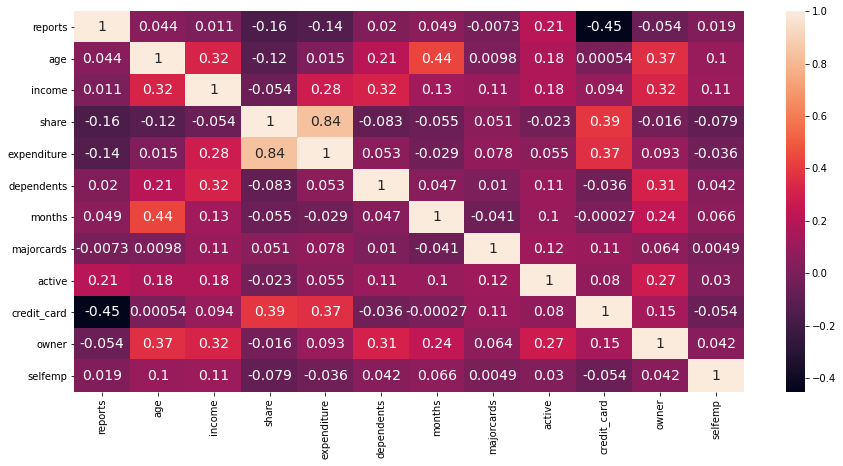

In [12]:
plt.figure(figsize = (15, 7))
sns.heatmap(credit_data.corr(), annot = True, annot_kws = {"size" : 14})

<AxesSubplot:xlabel='credit_card', ylabel='count'>

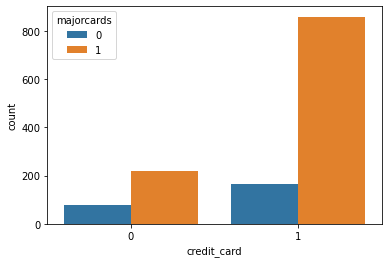

In [13]:
sns.countplot(x = "credit_card", hue = "majorcards", data = credit_data)

<AxesSubplot:xlabel='owner', ylabel='count'>

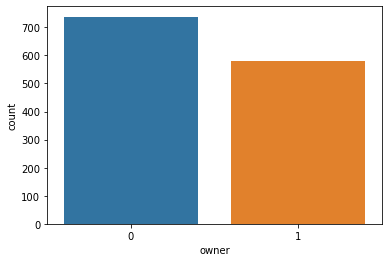

In [14]:
sns.countplot(x = "owner", data = credit_data)

<AxesSubplot:xlabel='credit_card', ylabel='count'>

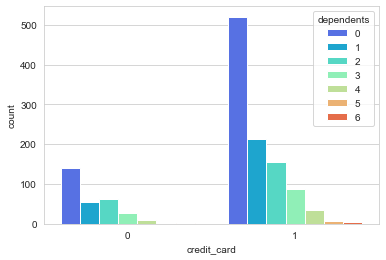

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'credit_card', hue = 'dependents', data = credit_data, palette = 'rainbow')

<AxesSubplot:xlabel='majorcards', ylabel='count'>

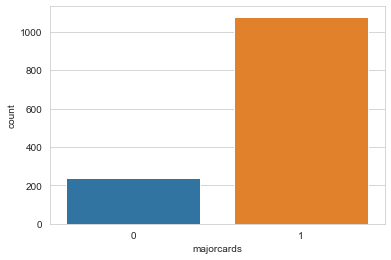

In [16]:
sns.countplot(x = "majorcards", data = credit_data)

<AxesSubplot:xlabel='age', ylabel='income'>

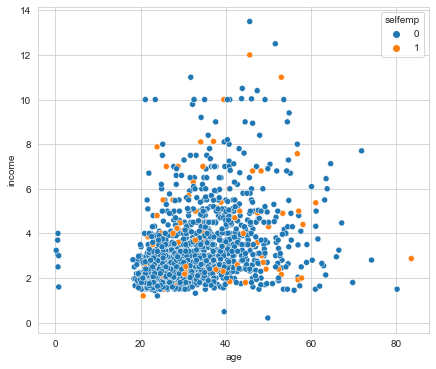

In [17]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x = "age", y = "income", hue = "selfemp", data = credit_data)

<AxesSubplot:xlabel='age'>

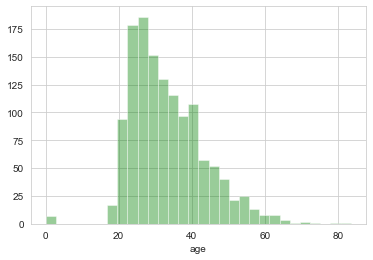

In [18]:
sns.distplot(credit_data['age'], kde = False, color = 'green', bins = 30)

<AxesSubplot:>

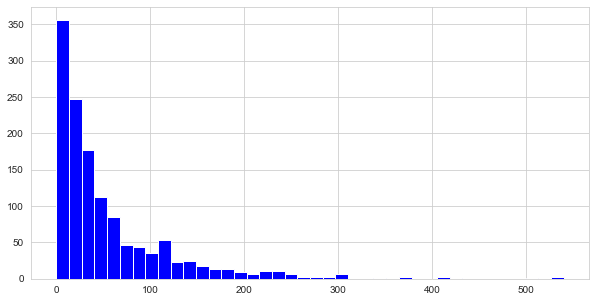

In [19]:
credit_data['months'].hist(color ='blue', bins = 40, figsize = (10, 5))

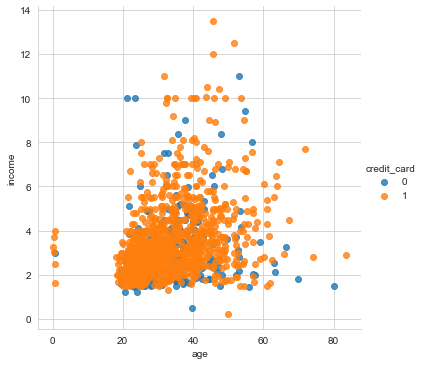

In [20]:
sns.lmplot('age', 'income', data = credit_data, fit_reg = False, hue = 'credit_card')

## Boxplots before removing outliers

<AxesSubplot:>

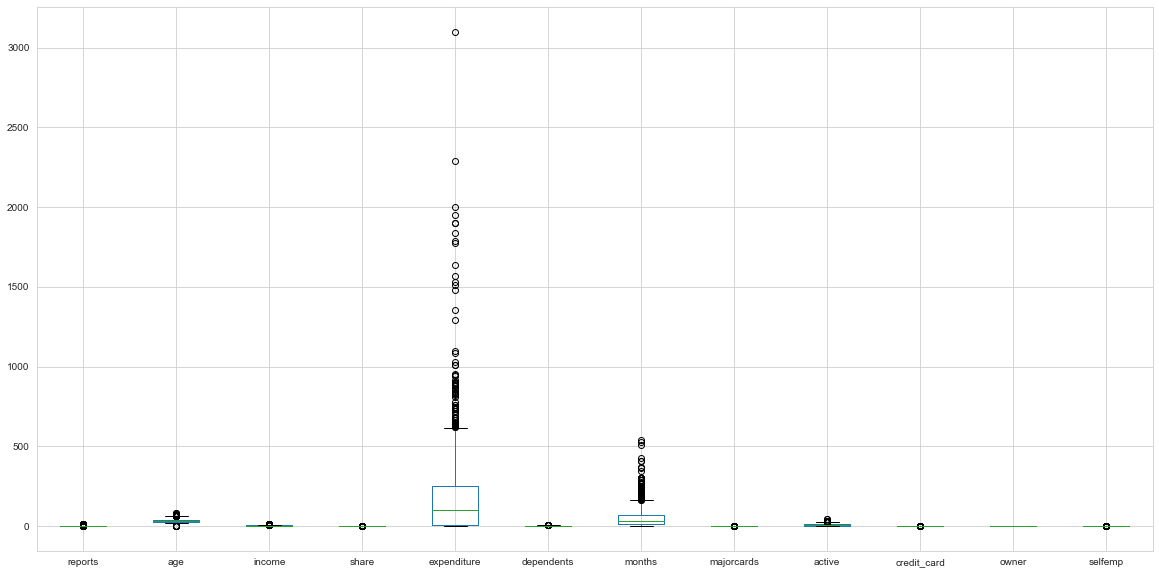

In [21]:
plt.figure(figsize = (20,10))
credit_data.boxplot()

<AxesSubplot:xlabel='credit_card', ylabel='age'>

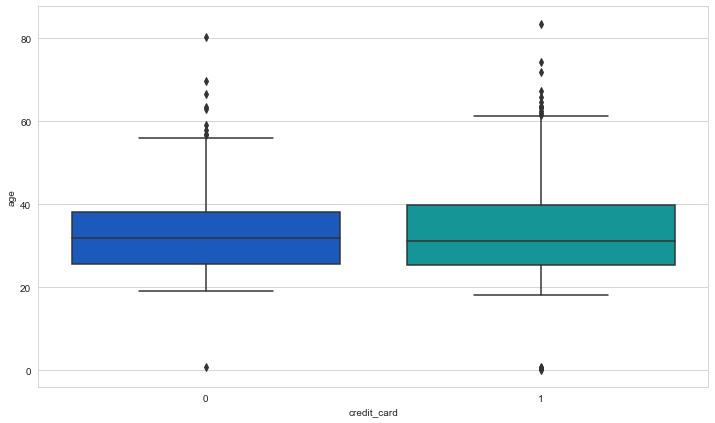

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y ='age', data = credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='expenditure'>

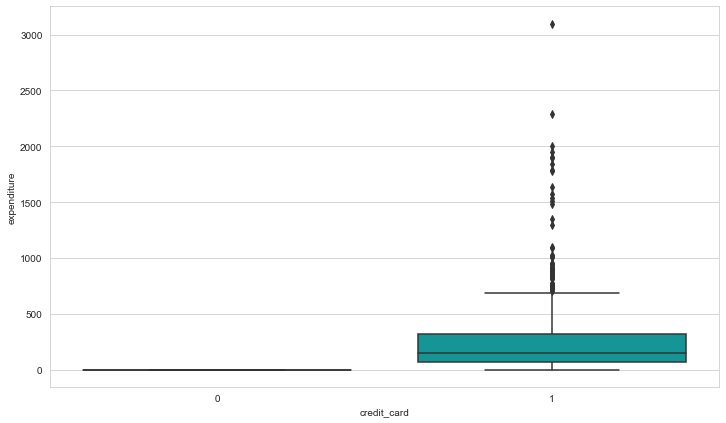

In [23]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='credit_card',y ='expenditure', data = credit_data, palette ='winter')

<AxesSubplot:xlabel='credit_card', ylabel='months'>

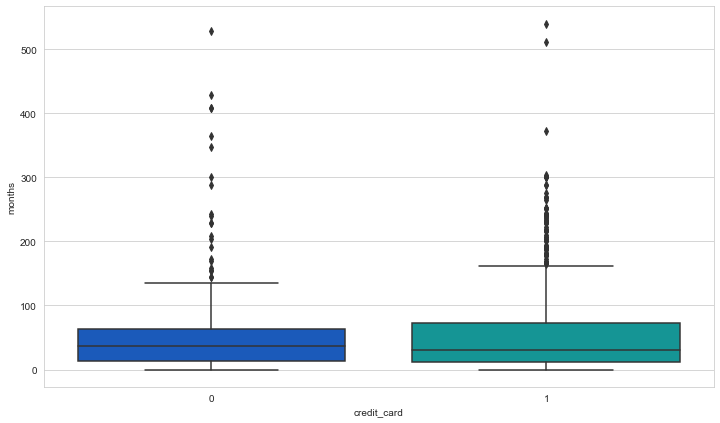

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='months',data=credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='active'>

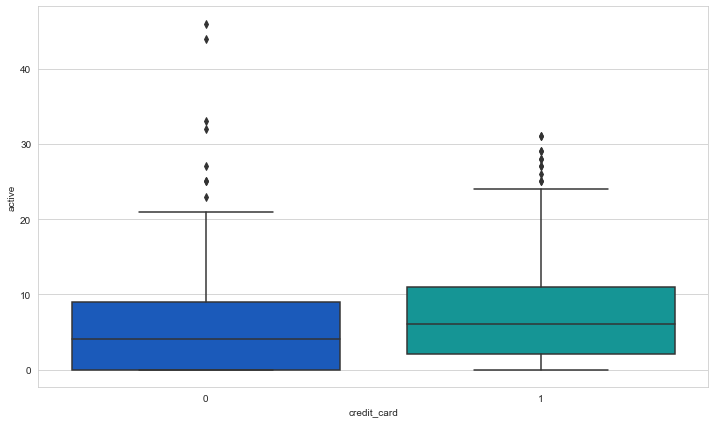

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='active',data=credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='dependents'>

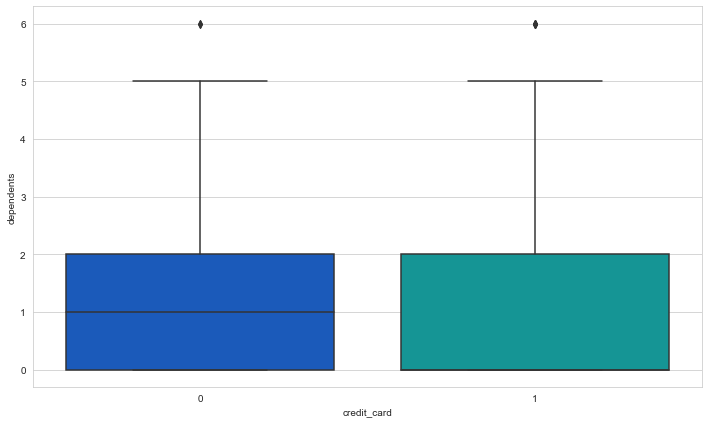

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='dependents',data=credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='age'>

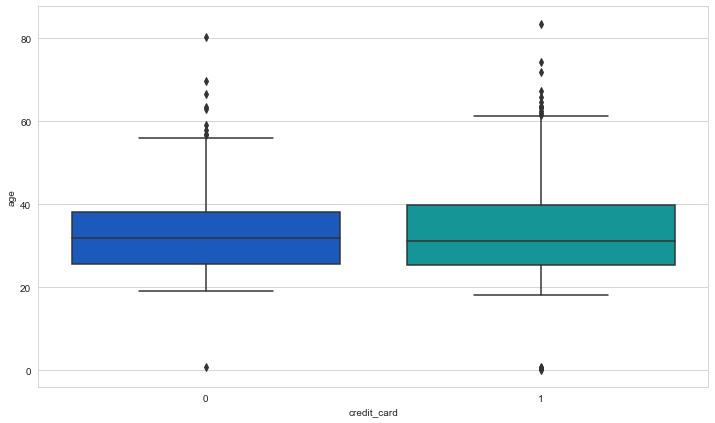

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='age',data=credit_data,palette='winter')

# Data Preprocessing

## Handling Outliers

In [28]:
# Replacing outliers in expenditure with median
exp1 = credit_data['expenditure'].quantile(0.25)
exp3 = credit_data['expenditure'].quantile(0.75)
exp2 = credit_data['expenditure'].quantile(0.50)
print(exp1, exp3)
print(exp2)
IQR_exp = exp3 - exp1
print(IQR_exp)

4.5833330000000005 249.0358
101.2983
244.45246699999998


In [29]:
out_exp1 = exp1 - 1.5 * IQR_exp
print(out_exp1)
out_exp2 = exp3 + 1.5 * IQR_exp
print(out_exp2)

-362.0953675
615.7145005


In [30]:
# Mean value
m_exp = credit_data['expenditure'].mean()
m_exp

185.0570707783927

In [31]:
credit_data["expenditure"] = np.where(credit_data["expenditure"] < out_exp1, exp2, credit_data['expenditure'])
credit_data["expenditure"] = np.where(credit_data["expenditure"] > out_exp2, exp2,credit_data['expenditure'])
print(credit_data['expenditure'].skew())

1.215931481230055


In [32]:
# Replacing outliers in months with median
months1 = credit_data['months'].quantile(0.25)
months2 = credit_data['months'].quantile(0.50)
months3 = credit_data['months'].quantile(0.75)

print(months1, months3)
print(months2)
IQR_months = months3 - months1
print(IQR_months)

12.0 72.0
30.0
60.0


In [33]:
out_months1 = months1 - 1.5 * IQR_months
print(out_months1)
out_months2 = months3 + 1.5 * IQR_months
print(out_months2)

-78.0
162.0


In [34]:
# Mean value
m_months = credit_data['months'].mean()
m_months

55.26762699014405

In [35]:
credit_data["months"] = np.where(credit_data["months"] < out_months1, months2, credit_data['months'])
credit_data["months"] = np.where(credit_data["months"] > out_months2, months2, credit_data['months'])
print(credit_data['months'].skew())

1.3837955053926425


In [36]:
# Replacing outliers in active with median
act1 = credit_data['active'].quantile(0.25)
act2 = credit_data['active'].quantile(0.50)
act3 = credit_data['active'].quantile(0.75)

print(act1, act3)
print(act2)
IQR_act = act3 - act1
print(IQR_act)

2.0 11.0
6.0
9.0


In [37]:
out_act1 = act1 - 1.5 * IQR_act
print(out_act1)
out_act2 = act3 + 1.5 * IQR_act
print(out_act2)

-11.5
24.5


In [38]:
# Mean value
m_act = credit_data['active'].mean()
m_act

6.99696739954511

In [39]:
credit_data["active"] = np.where(credit_data["active"] < out_act1, act2, credit_data['active'])
credit_data["active"] = np.where(credit_data["active"] > out_act2, act2, credit_data['active'])
print(credit_data['active'].skew())

0.7406328207211438


In [40]:
# Replacing outliers in age with median
age1 = credit_data['age'].quantile(0.25)
age2 = credit_data['age'].quantile(0.50)
age3 = credit_data['age'].quantile(0.75)

print(age1, age3)
print(age2)
IQR_age = age3 - age1
print(IQR_age)

25.41667 39.41667
31.25
14.000000000000004


In [41]:
out_age1 = age1 - 1.5 * IQR_age
print(out_age1)
out_age2 = age3 + 1.5 * IQR_age
print(out_age2)

4.416669999999993
60.41667000000001


In [42]:
# Mean value
m_age = credit_data['age'].mean()
m_age

33.21310325496592

In [43]:
credit_data["age"] = np.where(credit_data["age"] < out_age1, age2, credit_data['age'])
credit_data["age"] = np.where(credit_data["age"] > out_age2, age2, credit_data['age'])
print(credit_data['age'].skew())

0.7333260824556425


## Boxplots after removing outliers

<AxesSubplot:xlabel='credit_card', ylabel='age'>

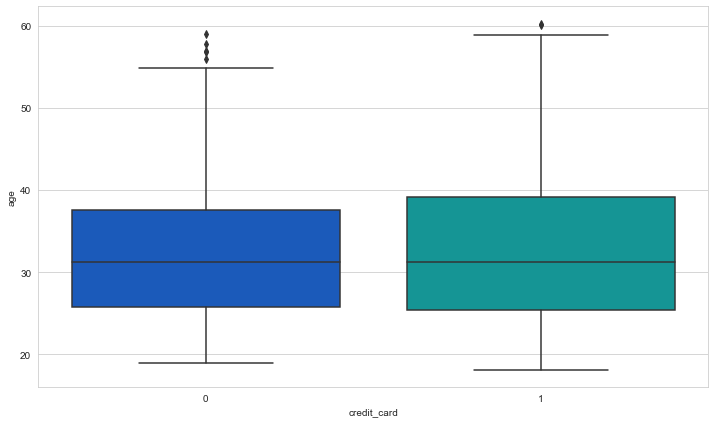

In [44]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='age',data=credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='expenditure'>

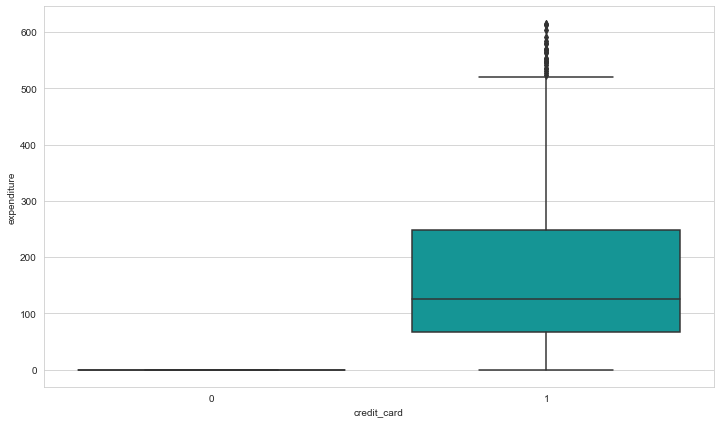

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='expenditure',data=credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='active'>

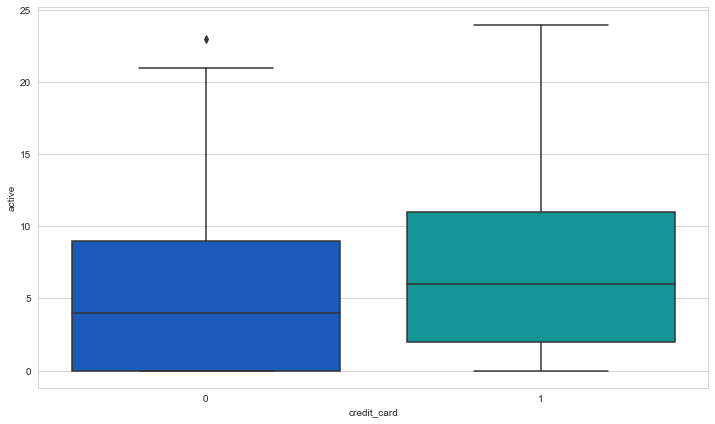

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='active',data=credit_data,palette='winter')

<AxesSubplot:xlabel='credit_card', ylabel='months'>

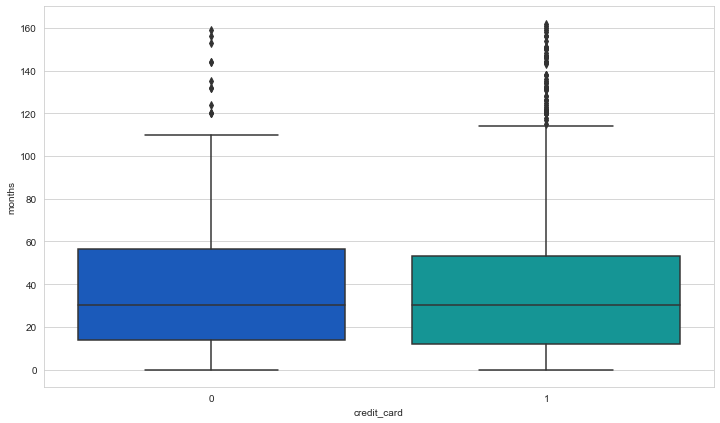

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='credit_card',y='months',data=credit_data,palette='winter')

# Modelling

## Linear Regression (Model 1)

In [48]:
X = credit_data.drop("credit_card", axis = 1)
y = credit_data.credit_card 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 176)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
print("X train:", len(X_train), "\nX test:", len(X_test), "\ny train:", len(y_train), "\ny test:", len(y_test))

X train: 923 
X test: 396 
y train: 923 
y test: 396


In [51]:
print("Intercept:", regressor.intercept_)

Intercept: 0.5601425797316895


In [52]:
print ('Number of coefficients:', len(regressor.coef_))
print ('Coefficients:', regressor.coef_)

Number of coefficients: 11
Coefficients: [-1.29238142e-01 -5.42439966e-04  8.75887376e-03  6.98527622e-01
  8.66195602e-04 -2.03624548e-02  1.35886113e-04  2.30734869e-02
  1.17413251e-02  5.04905576e-02 -5.39415141e-02]


In [53]:
y_predict = regressor.predict(X_test)
print ("y_predict : ", y_predict[:5], "Length:", len(y_predict))
print("R squared: %.6f" % regressor.score(X_test, y_test))

y_predict :  [ 1.07668836 -0.09494363  0.57845847  0.88610023  0.74008778] Length: 396
R squared: 0.415976


In [54]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_predict, y_test)
rmse = np.sqrt(mse)
print("Root Mean Square Error: %.5f" % rmse)

Root Mean Square Error: 0.32866


In [55]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_predict, y_test)
print("Mean Absolute Error: %.5f" % mae)

Mean Absolute Error: 0.26897


In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.415975740908356

In [57]:
# Score of Linear Regression Model
linreg_score = regressor.score(X, y)
linreg_score

0.42511511492464804

## Decision Tree (Model 2)

In [58]:
credit_data.credit_card.value_counts()

1    1023
0     296
Name: credit_card, dtype: int64

In [59]:
round(credit_data.credit_card.value_counts() * 100/len(credit_data.axes[0]), 2)

1    77.56
0    22.44
Name: credit_card, dtype: float64

In [60]:
X = credit_data.drop('credit_card', axis=1)
Y = credit_data['credit_card']

### Train and Test Data

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=176)

In [62]:
X_train

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner,selfemp
296,0,20.75000,1.9500,0.000615,0.00000,0,14.0,0,1.0,0,0
557,0,40.33333,2.0000,0.072386,120.55920,0,24.0,1,4.0,0,0
543,0,28.16667,2.0000,0.060250,100.41670,1,38.0,0,8.0,1,0
898,0,25.66667,1.7000,0.080070,113.09920,1,27.0,1,8.0,0,0
1049,1,35.83333,2.4000,0.023595,46.60583,1,37.0,1,13.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
892,0,28.50000,4.2320,0.123975,437.13420,0,30.0,1,5.0,0,1
920,0,31.58333,3.0000,0.213618,533.62750,0,7.0,1,1.0,0,0
836,0,28.33333,6.2000,0.068929,355.96830,0,18.0,1,9.0,1,0
701,0,37.83333,5.1600,0.000233,0.00000,0,86.0,1,1.0,1,1


In [63]:
Y_train

296     0
557     1
543     1
898     1
1049    1
       ..
892     1
920     1
836     1
701     0
832     1
Name: credit_card, Length: 923, dtype: uint8

## Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 126,max_depth = 3,min_samples_leaf = 2)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=126)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
y_pred_proba=classifier.predict_proba(X_test).round(2)
print(y_pred_proba)

[[0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.71 0.29]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.   1.  ]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]

In [67]:
# Score of Decision Tree model
dtree_score = classifier.score(X_test,Y_test)
dtree_score

0.9797979797979798

In [68]:
precision = metrics.precision_score(Y_test, y_pred)
recall = metrics.recall_score(Y_test, y_pred)
f1 = metrics.f1_score(Y_test, y_pred)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"f1-score: {f1}")
print(f"Recall: {recall}")

Accuracy: 0.9797979797979798
Precision: 1.0
f1-score: 0.9864406779661017
Recall: 0.9732441471571907


In [69]:
classification = pd.DataFrame({'y':Y_test, 'yhat':y_pred_proba[:,1]})
THRESHOLD = 0.6

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 975     1
207     0
774     1
833     1
1055    1
       ..
834     1
94      0
237     1
1178    1
435     1
Name: credit_card, Length: 396, dtype: uint8
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.71 0.29]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.   1.  ]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.97 0.03]
 [0.   1.  ]
 [0.

In [70]:
precision = metrics.precision_score(y,y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y,y_hat)
accuracy = metrics.accuracy_score(y, y_hat)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"f1-score: {f1}")
print(f"Recall: {recall}")

Accuracy: 0.9797979797979798
Precision: 1.0
f1-score: 0.9864406779661017
Recall: 0.9732441471571907


In [71]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 299
Negative count: 97
Count: 396
True Positive (TP, sensativity): 291 (97%)
True Negative (TN, specificity): 97 (100%)
False Positive (FP): 0 (0%)
False Negative (FN): 8 (2%)


## Confusion matrix

In [72]:
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # cm is the confusion matrix, names are the names of the classes.
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 97   0]
 [  8 291]]
Normalized confusion matrix
[[1.   0.  ]
 [0.03 0.97]]


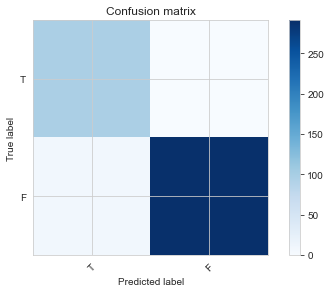

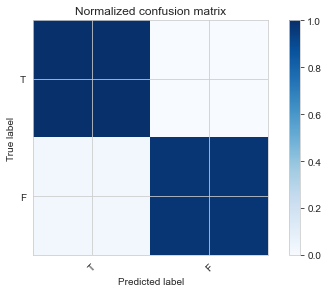

In [73]:
labels = ['T', 'F']
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

## ROC curve

In [74]:
fpr, tpr, thresholds = roc_curve(y, y_hat)
roc_auc = auc(fpr, tpr)
print(f"Y_test: {y}")
print(f"Y_pred: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y_test: [1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1]
Y_pred: [1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1

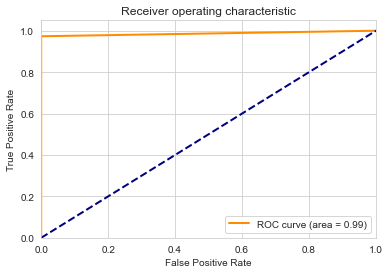

In [75]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [76]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0. 0. 1.]
TPR: [0.   0.97 1.  ]
thresholds: [2 1 0]


## Log loss

In [77]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [78]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.06846962265946085


## Decision tree visualization

In [79]:
dt_train_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth = 5, min_samples_leaf = 5)
dt_train_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [80]:
from sklearn import tree
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

http://www.webgraphviz.com/

## Naive Bayes (Model 3)

## Posterior Method

In [81]:
credit_data.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,credit_card,owner,selfemp
0,0,37.66667,4.5200,0.033270,124.983300,3,54.0,1,12.0,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34.0,1,13.0,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58.0,1,5.0,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25.0,1,7.0,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64.0,1,5.0,1,1,0


In [82]:
test = pd.DataFrame()

test["reports"] = [1]
test["age"] = [38]
test["income"] = [3.5]
test["share"] = [0.008]
test["owner"] = [0]
test["selfemp"] = [1]
test["dependents"] = [3]
test["months"] = [32]
test["majorcards"] = [1]
test["active"] = [10]

test

,reports,age,income,share,owner,selfemp,dependents,months,majorcards,active
0,1,38,3.5,0.008,0,1,3,32,1,10


In [83]:
n_yescard = credit_data["credit_card"][credit_data["credit_card"] == 1].count()
n_nocard = credit_data["credit_card"][credit_data["credit_card"] == 0].count()
total_ppl = credit_data["credit_card"].count()

print("Total number of people with card:", n_yescard)
print("Total number of people without card:", n_nocard)
print("Total number of people:", total_ppl)

Total number of people with card: 1023
Total number of people without card: 296
Total number of people: 1319


In [84]:
p_yescard = n_yescard/total_ppl
p_nocard = n_nocard/total_ppl
print(f"Prior for people with card: {p_yescard}\nPrior for people without card: {p_nocard}")

Prior for people with card: 0.775587566338135
Prior for people without card: 0.22441243366186506


In [85]:
data_means = credit_data.groupby("credit_card").mean()
print(data_means)

              reports        age    income     share  expenditure  dependents  \
credit_card                                                                     
0            1.587838  32.675957  3.068509  0.000477     0.000000    1.077703   
1            0.129032  32.860622  3.451273  0.088482   172.764715    0.969697   

                months  majorcards    active     owner   selfemp  
credit_card                                                       
0            40.277027    0.739865  5.412162  0.304054  0.094595  
1            40.314761    0.839687  7.035191  0.479961  0.061584  


In [86]:
yescard_reports_mean = data_means["reports"][data_means.index == 1].values[0]
yescard_age_mean = data_means["age"][data_means.index == 1].values[0]
yescard_income_mean = data_means["income"][data_means.index == 1].values[0]
yescard_share_mean = data_means["share"][data_means.index == 1].values[0]
yescard_owner_mean = data_means["owner"][data_means.index == 1].values[0]
yescard_selfemp_mean = data_means["selfemp"][data_means.index == 1].values[0]
yescard_dependents_mean = data_means["dependents"][data_means.index == 1].values[0]
yescard_months_mean = data_means["months"][data_means.index == 1].values[0]
yescard_majorcards_mean = data_means["majorcards"][data_means.index == 1].values[0]
yescard_active_mean = data_means["active"][data_means.index == 1].values[0]

print(yescard_reports_mean) 
print(yescard_age_mean)
print(yescard_income_mean)
print(yescard_share_mean)
print(yescard_owner_mean)
print(yescard_selfemp_mean)
print(yescard_dependents_mean)
print(yescard_months_mean)
print(yescard_majorcards_mean)
print(yescard_active_mean)

0.12903225806451613
32.8606222385142
3.4512730205278537
0.08848152972453567
0.47996089931573804
0.06158357771260997
0.9696969696969697
40.31476050830889
0.8396871945259042
7.035190615835777


In [87]:
nocard_reports_mean = data_means["reports"][data_means.index == 0].values[0]
nocard_age_mean = data_means["age"][data_means.index == 0].values[0]
nocard_income_mean = data_means["income"][data_means.index == 0].values[0]
nocard_share_mean = data_means["share"][data_means.index == 0].values[0]
nocard_owner_mean = data_means["owner"][data_means.index == 0].values[0]
nocard_selfemp_mean = data_means["selfemp"][data_means.index == 0].values[0]
nocard_dependents_mean = data_means["dependents"][data_means.index == 0].values[0]
nocard_months_mean = data_means["months"][data_means.index == 0].values[0]
nocard_majorcards_mean = data_means["majorcards"][data_means.index == 0].values[0]
nocard_active_mean = data_means["active"][data_means.index == 0].values[0]

print(nocard_reports_mean) 
print(nocard_age_mean)
print(nocard_income_mean)
print(nocard_share_mean)
print(nocard_owner_mean)
print(nocard_selfemp_mean)
print(nocard_dependents_mean)
print(nocard_months_mean)
print(nocard_majorcards_mean)
print(nocard_active_mean)

1.587837837837838
32.67595716216216
3.0685091216216236
0.0004767954841216213
0.30405405405405406
0.0945945945945946
1.0777027027027026
40.277027027027025
0.7398648648648649
5.412162162162162


In [88]:
data_variance = credit_data.groupby("credit_card").var()
print(data_variance)

              reports        age    income         share   expenditure  \
credit_card                                                              
0            5.829546  72.810718  2.609312  4.541066e-08      0.000000   
1            0.173158  81.062618  2.914247  9.814900e-03  20629.859928   

             dependents       months  majorcards    active     owner   selfemp  
credit_card                                                                     
0              1.597332  1107.285708    0.193117  28.96853  0.212322  0.085937  
1              1.544091  1467.489870    0.134744  32.37058  0.249843  0.057848  


In [89]:
yescard_reports_variance = data_variance["reports"][data_variance.index == 1].values[0]
yescard_age_variance = data_variance["age"][data_variance.index == 1].values[0]
yescard_income_variance = data_variance["income"][data_variance.index == 1].values[0]
yescard_share_variance = data_variance["share"][data_variance.index == 1].values[0]
yescard_owner_variance = data_variance["owner"][data_variance.index == 1].values[0]
yescard_selfemp_variance = data_variance["selfemp"][data_variance.index == 1].values[0]
yescard_dependents_variance = data_variance["dependents"][data_variance.index == 1].values[0]
yescard_months_variance = data_variance["months"][data_variance.index == 1].values[0]
yescard_majorcards_variance = data_variance["majorcards"][data_variance.index == 1].values[0]
yescard_active_variance = data_variance["active"][data_variance.index == 1].values[0]

print(yescard_reports_variance) 
print(yescard_age_variance)
print(yescard_income_variance)
print(yescard_share_variance)
print(yescard_owner_variance)
print(yescard_selfemp_variance)
print(yescard_dependents_variance)
print(yescard_months_variance)
print(yescard_majorcards_variance)
print(yescard_active_variance)

0.17315826021084516
81.06261754797717
2.9142465930287327
0.009814900088751974
0.24984265991778135
0.05784758767525009
1.544090612583764
1467.4898699768328
0.1347443247575817
32.3705803696966


In [90]:
nocard_reports_variance = data_variance["reports"][data_variance.index == 0].values[0]
nocard_age_variance = data_variance["age"][data_variance.index == 0].values[0]
nocard_income_variance = data_variance["income"][data_variance.index == 0].values[0]
nocard_share_variance = data_variance["share"][data_variance.index == 0].values[0]
nocard_owner_variance = data_variance["owner"][data_variance.index == 0].values[0]
nocard_selfemp_variance = data_variance["selfemp"][data_variance.index == 0].values[0]
nocard_dependents_variance = data_variance["dependents"][data_variance.index == 0].values[0]
nocard_months_variance = data_variance["months"][data_variance.index == 0].values[0]
nocard_majorcards_variance = data_variance["majorcards"][data_variance.index == 0].values[0]
nocard_active_variance = data_variance["active"][data_variance.index == 0].values[0]

print(nocard_reports_variance) 
print(nocard_age_variance)
print(nocard_income_variance)
print(nocard_share_variance)
print(nocard_owner_variance)
print(nocard_selfemp_variance)
print(nocard_dependents_variance)
print(nocard_months_variance)
print(nocard_majorcards_variance)
print(nocard_active_variance)

5.829546495648191
72.81071825852008
2.609311878933464
4.541066130498568e-08
0.21232249198350892
0.08593678424186893
1.5973316536875855
1107.2857077416406
0.1931172698121853
28.968529546495624


In [91]:
def p_x_given_y(x, mean_y, variance_y):
    p = 1 / (np.sqrt(2 * np.pi * variance_y))* np.exp(( - (x - mean_y) ** 2) / (2 * variance_y))
    return p

In [92]:
credit_data.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,credit_card,owner,selfemp
0,0,37.66667,4.5200,0.033270,124.983300,3,54.0,1,12.0,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34.0,1,13.0,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58.0,1,5.0,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25.0,1,7.0,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64.0,1,5.0,1,1,0


In [93]:
posterior_yescard = p_yescard * \
                    p_x_given_y(test["reports"][0], yescard_reports_mean, yescard_reports_variance) * \
                    p_x_given_y(test["age"][0], yescard_age_mean, yescard_age_variance) * \
                    p_x_given_y(test["income"][0], yescard_income_mean, yescard_income_variance) * \
                    p_x_given_y(test["share"][0], yescard_share_mean, yescard_share_variance) * \
                    p_x_given_y(test["owner"][0], yescard_owner_mean, yescard_owner_variance) * \
                    p_x_given_y(test["selfemp"][0], yescard_selfemp_mean, yescard_selfemp_variance) * \
                    p_x_given_y(test["dependents"][0], yescard_dependents_mean, yescard_dependents_variance) * \
                    p_x_given_y(test["months"][0], yescard_months_mean, yescard_months_variance) * \
                    p_x_given_y(test["majorcards"][0], yescard_majorcards_mean, yescard_majorcards_variance) * \
                    p_x_given_y(test["active"][0], yescard_active_mean, yescard_active_variance)
print("Posterior for yescard: ", posterior_yescard)

Posterior for yescard:  4.547021189831736e-11


In [94]:
posterior_nocard = p_nocard * \
                   p_x_given_y(test["reports"][0], nocard_reports_mean, nocard_reports_variance) * \
                    p_x_given_y(test["age"][0], nocard_age_mean, nocard_age_variance) * \
                    p_x_given_y(test["income"][0], nocard_income_mean, nocard_income_variance) * \
                    p_x_given_y(test["share"][0], nocard_share_mean, nocard_share_variance) * \
                    p_x_given_y(test["owner"][0], nocard_owner_mean, nocard_owner_variance) * \
                    p_x_given_y(test["selfemp"][0], nocard_selfemp_mean, nocard_selfemp_variance) * \
                    p_x_given_y(test["dependents"][0], nocard_dependents_mean, nocard_dependents_variance) * \
                    p_x_given_y(test["months"][0], nocard_months_mean, nocard_months_variance) * \
                    p_x_given_y(test["majorcards"][0], nocard_majorcards_mean, nocard_majorcards_variance) * \
                    p_x_given_y(test["active"][0], nocard_active_mean, nocard_active_variance)
print("Posterior for nocard: ", posterior_nocard)

Posterior for nocard:  5.084343973206736e-278


In [95]:
if (posterior_yescard > posterior_nocard):
    print("The person has a card!")
else:
    print("The person doesn't have a card!")

The person has a card!


In [96]:
X = credit_data.drop('credit_card', axis=1)
y = credit_data['credit_card']

In [97]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = 0.4, random_state=114)

In [98]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
trained = clf.fit(X_tr, y_tr)

In [99]:
y_pd = trained.predict(X_ts)
y_pd

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [100]:
# Score of Naive Bayes Model
nb_score = trained.score(X_ts,y_ts)
nb_score

0.9810606060606061

In [101]:
precision = metrics.precision_score(y_ts, y_pd)
recall = metrics.recall_score(y_ts, y_pd)
f1 = metrics.f1_score(y_ts, y_pd)
accuracy = metrics.accuracy_score(y_ts, y_pd)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"f1-score: {f1}")
print(f"Recall: {recall}")

Accuracy: 0.9810606060606061
Precision: 1.0
f1-score: 0.9876543209876543
Recall: 0.975609756097561


## K-NN (Model 4)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [103]:
X = credit_data.drop('credit_card', axis=1)
y = credit_data['credit_card']

In [104]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.5,random_state=201)

In [105]:
scaler = StandardScaler()
scaler.fit(X_train)

X_tr = scaler.transform(X_tr)
X_ts = scaler.transform(X_ts)
print(X_tr)
print (X_tr, X_tr.shape)
print (X_ts, X_ts.shape)

[[-0.34 -0.96 -0.47 ... -0.83 -0.9   3.63]
 [-0.34 -0.29 -0.53 ...  0.4   1.11  3.63]
 [-0.34 -1.16  0.54 ...  0.76 -0.9  -0.28]
 ...
 [ 3.66 -0.88 -0.06 ...  2.88  1.11 -0.28]
 [-0.34 -1.32 -0.74 ... -1.19 -0.9  -0.28]
 [-0.34 -1.17 -0.95 ... -1.19 -0.9  -0.28]]
[[-0.34 -0.96 -0.47 ... -0.83 -0.9   3.63]
 [-0.34 -0.29 -0.53 ...  0.4   1.11  3.63]
 [-0.34 -1.16  0.54 ...  0.76 -0.9  -0.28]
 ...
 [ 3.66 -0.88 -0.06 ...  2.88  1.11 -0.28]
 [-0.34 -1.32 -0.74 ... -1.19 -0.9  -0.28]
 [-0.34 -1.17 -0.95 ... -1.19 -0.9  -0.28]] (659, 11)
[[-0.34 -0.88 -0.97 ...  0.93 -0.9  -0.28]
 [-0.34  0.26  0.84 ...  2.    1.11 -0.28]
 [-0.34  0.6   0.36 ...  0.23  1.11 -0.28]
 ...
 [-0.34  1.54  0.48 ... -0.13  1.11 -0.28]
 [ 0.46 -0.23  0.57 ... -0.3  -0.9  -0.28]
 [-0.34  0.9   0.84 ...  1.82  1.11 -0.28]] (660, 11)


In [106]:
clf = KNeighborsClassifier(11, weights='uniform')
clf = clf.fit(X_tr, y_tr)

In [107]:
y_predict = clf.predict(X_ts)

In [108]:
y_pred_proba= clf.predict_proba(X_ts)
y_pred_proba

array([[0.  , 1.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [0.36, 0.64],
       [0.  , 1.  ]])

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n\n", confusion_matrix(y_ts, y_predict))
print("\nClassification Report:\n\n", classification_report(y_ts, y_predict))

Confusion Matrix:

 [[ 85  67]
 [ 10 498]]

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.56      0.69       152
           1       0.88      0.98      0.93       508

    accuracy                           0.88       660
   macro avg       0.89      0.77      0.81       660
weighted avg       0.88      0.88      0.87       660



In [110]:
precision = metrics.precision_score(y_ts, y_predict)
recall = metrics.recall_score(y_ts, y_predict)
f1 = metrics.f1_score(y_ts, y_predict)
accuracy = metrics.accuracy_score(y_ts, y_predict)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"f1-score: {f1}")
print(f"Recall: {recall}")

Accuracy: 0.8833333333333333
Precision: 0.8814159292035398
f1-score: 0.9282385834109972
Recall: 0.9803149606299213


In [111]:
# Score of K-NN Model
knn_score = clf.score(X_ts,y_ts)
knn_score

0.8833333333333333

In [112]:
classification = pd.DataFrame({'y':y_ts, 'yhat':y_pred_proba[:,1]})
THRESHOLD = 0.6

y = np.array(y_ts)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_ts}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 1174    1
1060    1
805     1
1016    1
645     1
       ..
125     1
1071    1
999     1
468     0
641     1
Name: credit_card, Length: 660, dtype: uint8
y_pred_proba: [[0.   1.  ]
 [0.09 0.91]
 [0.   1.  ]
 ...
 [0.09 0.91]
 [0.36 0.64]
 [0.   1.  ]]
y: [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 

In [113]:
precision = metrics.precision_score(y,y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y,y_hat)
accuracy = metrics.accuracy_score(y, y_hat)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"f1-score: {f1}")
print(f"Recall: {recall}")

Accuracy: 0.8878787878787879
Precision: 0.9109848484848485
f1-score: 0.9285714285714286
Recall: 0.9468503937007874


In [114]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 508
Negative count: 152
Count: 660
True Positive (TP, sensativity): 481 (94%)
True Negative (TN, specificity): 105 (69%)
False Positive (FP): 47 (30%)
False Negative (FN): 27 (5%)


## Confusion Matrix

In [115]:
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[105  47]
 [ 27 481]]

Normalized confusion matrix
[[0.69 0.31]
 [0.05 0.95]]


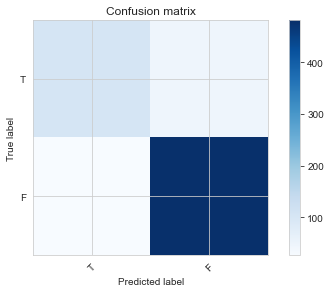

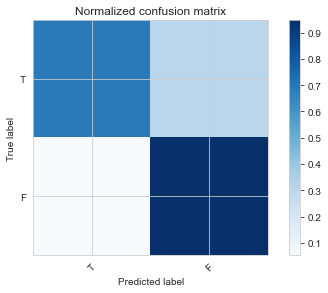

In [116]:
labels = ['T', 'F']
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('\nNormalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

## ROC Curve (KNN)

In [117]:
fpr, tpr, thresholds = roc_curve(y, y_hat)
roc_auc = auc(fpr, tpr)
print(f"Y_test: {y}")
print(f"Y_pred: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y_test: [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 

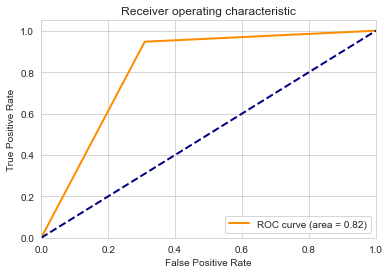

In [118]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [119]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.31 1.  ]
TPR: [0.   0.95 1.  ]
thresholds: [2 1 0]


## Log Loss

In [120]:
y = np.array(y_ts)
y_hat = np.array(y_pred_proba[:,1])

In [121]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.3593508224741226


## MODEL COMPARISON

In [122]:
data = {'Modules': ['Linear Regression', 'Decision tree', 'Naive bayes', 'KNN'], 
        'Score': [linreg_score, dtree_score, nb_score, knn_score ]} 
df = pd.DataFrame(data, index = ['1', '2', '3', '4']) 
df

,Modules,Score
1,Linear Regression,0.425115
2,Decision tree,0.979798
3,Naive bayes,0.981061
4,KNN,0.883333


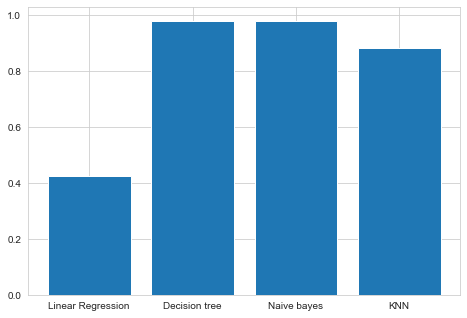

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
modules = ['Linear Regression', 'Decision tree', 'Naive bayes', 'KNN']
score = [linreg_score, dtree_score, nb_score, knn_score ]
ax.bar(modules,score)
plt.show()